## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

### [Boston house prices dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston)
- [Data Set Characteristics](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)
    - CRIM per capita crime rate by town : 犯罪率
    - ZN proportion of residential land zoned for lots over 25,000 sq.ft.:規畫住宅用地的比例超過25,000平方英尺
    - INDUS proportion of non-retail business acres per town: 每個城鎮非零售業務佔比的比例
    - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise): 是否被河道包围，如果是则为1，否则为0
    - NOX nitric oxides concentration (parts per 10 million):一氧化氮濃度
    - RM average number of rooms per dwelling: 每間住宅的平均房間數
    - AGE proportion of owner-occupied units built prior to 1940: 在1940年之前建造的自住單位比例
    - DIS weighted distances to five Boston employment centres: 加權距離到波士頓的五個就業中心
    - RAD index of accessibility to radial highways: 高速公路可達性指數
    - TAX full-value property-tax rate per $\$10,000$ :每$\$10,000$的不動產稅
    - PTRATIO pupil-teacher ratio by town: 城鎮的師生比例
    - B $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town :其中Bk是城鎮黑人的比例
    - LSTAT % lower status of the population:地位較低人士的百分比
    - MEDV Median value of owner-occupied homes in $1000’s:自住房屋的中位數(需要預測的值)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
boston = datasets.load_boston()
x = boston.data
y = boston.target
print('Boston Housing Price Feature Array Shape:', x.shape)
print('Boston Housing Price Target Array Shape:', y.shape)
print(type(x))

Boston Housing Price Feature Array Shape: (506, 13)
Boston Housing Price Target Array Shape: (506,)
<class 'numpy.ndarray'>


In [3]:
cols = ['CRIM ', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO'
        , 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(np.concatenate((x, y.reshape(len(y), 1)), axis=1), columns=cols)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


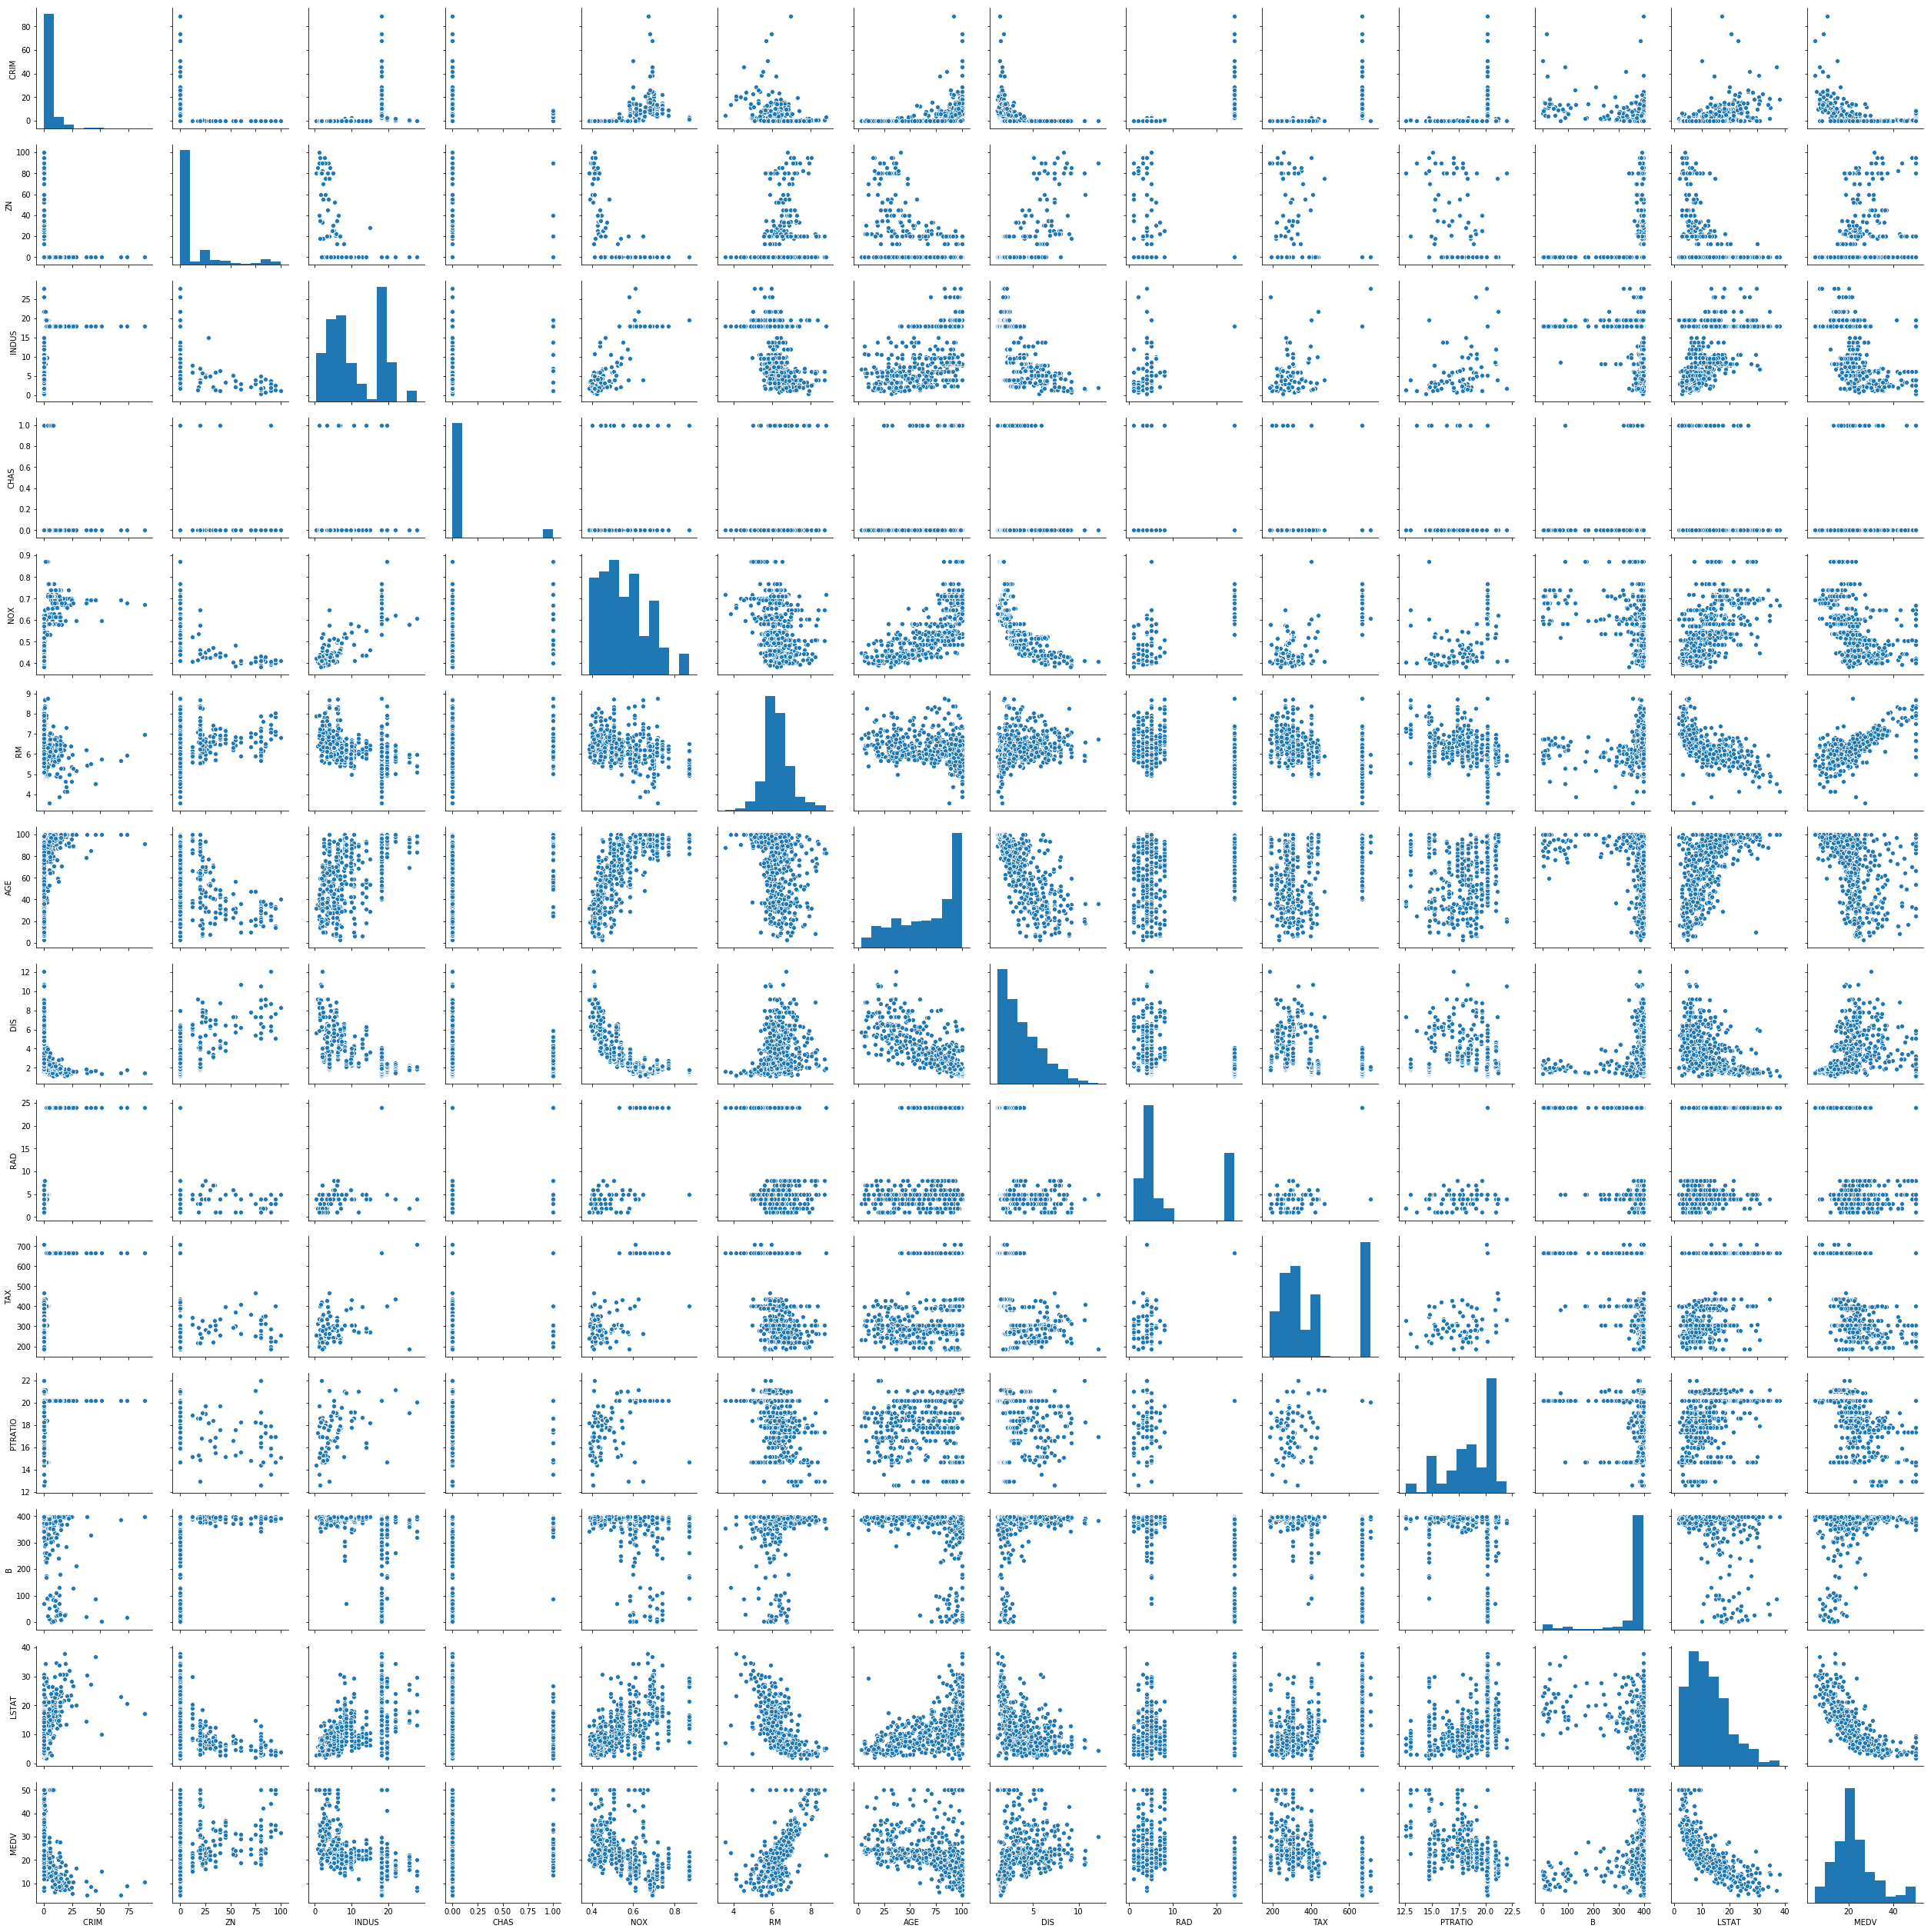

In [4]:
sns.pairplot(df)

In [8]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

print(regr.coef_)
# 預測值與實際值的差距，使用 MSE
print("Linear Regression Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

[-1.25856659e-01  4.84257396e-02  1.84085281e-02  3.08509569e+00
 -1.73277018e+01  3.61674713e+00  2.19181853e-03 -1.49361132e+00
  3.19979200e-01 -1.27294649e-02 -9.27469086e-01  9.50912468e-03
 -5.33592471e-01]
Linear Regression Mean squared error: 17.04


### LASSO

In [11]:
lasso = linear_model.Lasso(alpha=1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
# 印出各特徵對應的係數，可以看到許多係數都變成 0，Lasso Regression 的確可以做特徵選取
print(lasso.coef_)
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

[-0.07256057  0.04967103 -0.          0.         -0.          0.80886056
  0.02328171 -0.68444051  0.26862528 -0.01526566 -0.71692899  0.00828412
 -0.77123108]
Mean squared error: 23.24


In [28]:
for para in range(0, 11):
    para = para / 10
    if para == 0:
        regr = linear_model.LinearRegression()
    else:
        regr = linear_model.Lasso(alpha=para)
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    MSE = mean_squared_error(y_test, y_pred)
    print("Alpha={}, Mean squared error: {:.2f}".format(para, MSE))
    

Alpha=0.0, Mean squared error: 17.04
Alpha=0.1, Mean squared error: 18.19
Alpha=0.2, Mean squared error: 18.42
Alpha=0.3, Mean squared error: 18.77
Alpha=0.4, Mean squared error: 19.17
Alpha=0.5, Mean squared error: 19.66
Alpha=0.6, Mean squared error: 20.22
Alpha=0.7, Mean squared error: 20.85
Alpha=0.8, Mean squared error: 21.57
Alpha=0.9, Mean squared error: 22.37
Alpha=1.0, Mean squared error: 23.24


### Ridge

In [31]:
# 建立一個線性回歸模型
ridge = linear_model.Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred = regr.predict(x_test)
# 印出 Ridge 的參數，可以很明顯看到比起 Linear Regression，參數的數值小了一點
print(ridge.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

[-1.22488037e-01  4.95483049e-02 -1.15839833e-02  2.89071820e+00
 -1.00402895e+01  3.66674306e+00 -4.43653915e-03 -1.38990862e+00
  3.02286292e-01 -1.32259798e-02 -8.52141794e-01  9.86708353e-03
 -5.43681130e-01]
Mean squared error: 17.35


In [29]:
for para in range(0, 11):
    para = para / 10
    if para == 0:
        regr = linear_model.LinearRegression()
    else:
        regr = linear_model.Ridge(alpha=para)
    regr.fit(x_train, y_train)
    y_pred = regr.predict(x_test)
    MSE = mean_squared_error(y_test, y_pred)
    print("Alpha={}, Mean squared error: {:.2f}".format(para, MSE))

Alpha=0.0, Mean squared error: 17.04
Alpha=0.1, Mean squared error: 17.07
Alpha=0.2, Mean squared error: 17.10
Alpha=0.3, Mean squared error: 17.13
Alpha=0.4, Mean squared error: 17.16
Alpha=0.5, Mean squared error: 17.20
Alpha=0.6, Mean squared error: 17.23
Alpha=0.7, Mean squared error: 17.26
Alpha=0.8, Mean squared error: 17.29
Alpha=0.9, Mean squared error: 17.32
Alpha=1.0, Mean squared error: 17.35


### 結論
可以看見 LASSO 與 Ridge 的結果並沒有比原本的線性回歸來得好，
這是因為目標函數被加上了正規化函數，讓模型不能過於複雜，相當於限制模型擬和資料的能力。因此若沒有發現 Over-fitting 的情況，是可以不需要一開始就加上太強的正規化的。